In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer


In [2]:
%pip install -q pyarrow --disable-pip-version-check


Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb =pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
df.shape[1]

19

In [6]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [7]:
df['duration'] =(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60

sd = df['duration'].std()
print(sd)

42.59435124195458


In [8]:
print(df['duration'].describe())

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64


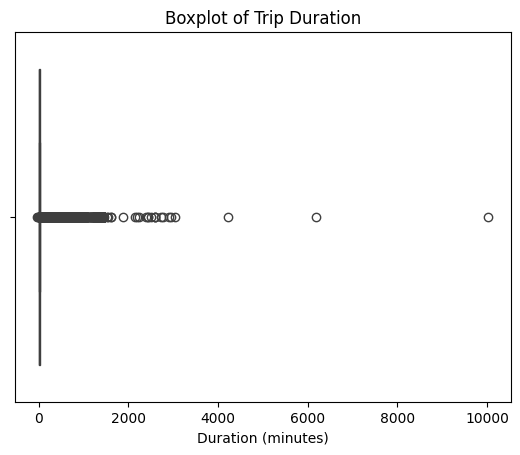

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['duration'])
plt.xlabel('Duration (minutes)')
plt.title('Boxplot of Trip Duration')
plt.show()


In [10]:
new_df= df[(df['duration'] >= 1) & (df['duration'] <= 60)].copy()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [11]:
remain = (len(new_df)/len(df) * 100)
remain

98.1220282212598

In [12]:
new_df['PULocationID'] = new_df['PULocationID'].astype(str)
new_df['DOLocationID'] = new_df['DOLocationID'].astype(str)

In [13]:
new_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [14]:
train_dicts = new_df[['PULocationID', 'DOLocationID']].to_dict(orient='records')


In [15]:
dv = DictVectorizer()
X_train=dv.fit_transform(train_dicts)

In [16]:
X_train.shape[1]

515

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error


y_train =new_df['duration']


lr =LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred =lr.predict(X_train)

rmse = root_mean_squared_error(y_train, y_pred)

print(f"Training RMSE: {rmse:.2f}")

Training RMSE: 7.65


### Validating the model


In [19]:
df_feb['duration'] = (df_feb['tpep_dropoff_datetime'] - df_feb['tpep_pickup_datetime']).dt.total_seconds() / 60


In [20]:
df_feb = df_feb[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60)].copy()

In [21]:
df_feb['PULocationID'] = df_feb['PULocationID'].astype(str)
df_feb['DOLocationID'] = df_feb['DOLocationID'].astype(str)

val_dicts = df_feb[['PULocationID', 'DOLocationID']].to_dict(orient='records')


In [22]:
X_val = dv.transform(val_dicts)
y_val = df_feb['duration']
y_pred = lr.predict(X_val)


In [23]:
rmse = root_mean_squared_error(y_val, y_pred)
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 7.81
